In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Advanced Statistical Modeling
The point of this notebook is to try to find the point at which the user discovers the value of the service and converts to a subscriber.  Back in the day, Facebook found if a new user had 7 friends within 10 days of signing up they were much more likely to stick around and use the service.  With this result, they built features to encourage users to connect with friends.
#### Why this matters here
If a similar, simple metric can be found it can help the business understand what to foucs on.
#### How will this stat be found?
- Using the insights from the `analysis.ipynb` notebook I will upgrade the statistical rigour.
- This will be done via OLS Regression
    - OLS Regression allows for interpreting variables' effect on the target in an incremental manner while holding all other variables constant.  It also allows for causal interpretations. 

In [3]:
df = pd.read_csv('stats_df.csv')
print(df.shape)
print(df.columns)
df.head()

(421880, 41)
Index(['USER_ID', 'USER_SUBSCRIPTION_STATUS', 'N_TEAM_ASSOCIATIONS',
       'N_TEAM_GAMES_SCORED', 'N_TEAM_VIDEOS_STREAMED',
       'N_GAMES_SCORED_BY_USER', 'N_GAMES_STREAMED_BY_USER',
       'N_DAYS_USER_ACTIVE', 'TEAM_AGE_GROUPS_Between 13 - 18',
       'TEAM_AGE_GROUPS_Under 13', 'TEAM_AGE_GROUPS_Over 18',
       'TEAM_COMPETITION_LEVELS_school', 'TEAM_COMPETITION_LEVELS_club_travel',
       'TEAM_COMPETITION_LEVELS_recreational', 'TEAM_ROLES_family',
       'TEAM_ROLES_fan', 'TEAM_ROLES_manager', 'TEAM_ROLES_admin',
       'TEAM_ROLES_player', 'TEAM_SPORTS_baseball', 'TEAM_SPORTS_softball',
       'TEAM_SPORTS_soccer', 'TEAM_SPORTS_fieldHockey',
       'TEAM_SPORTS_basketball', 'TEAM_SPORTS_football',
       'TEAM_SPORTS_volleyball', 'TEAM_SPORTS_flagFootball',
       'TEAM_SPORTS_cheerleading', 'TEAM_SPORTS_hockey', 'TEAM_SPORTS_rugby',
       'TEAM_SPORTS_lacrosse', 'TEAM_SPORTS_wrestling',
       'TEAM_SPORTS_trackAndField', 'TEAM_SPORTS_other',
       'TEAM_SPORTS

,USER_ID,USER_SUBSCRIPTION_STATUS,N_TEAM_ASSOCIATIONS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE,TEAM_AGE_GROUPS_Between 13 - 18,TEAM_AGE_GROUPS_Under 13,...,TEAM_SPORTS_wrestling,TEAM_SPORTS_trackAndField,TEAM_SPORTS_other,TEAM_SPORTS_rowingAndCrew,TEAM_SPORTS_tennis,TEAM_SPORTS_golf,TEAM_SPORTS_swimmingAndDiving,TEAM_SPORTS_bowling,TEAM_SPORTS_crossCountry,TEAM_SPORTS_waterPolo
0,2,0,0.0,0.0,0.0,0.0,0.0,49.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,2.0,1.0,0.0,0.0,0.0,374.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,11.0,125.0,0.0,0.0,0.0,658.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6,0,3.0,30.0,0.0,0.0,0.0,85.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0.0,0.0,0.0,0.0,0.0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0


## OLS Regression
In building these models I hope to find a general strategic approach to convert unsubscribed users to subscribed based on attributes and behaviors.  These models will be 'explaining' the why behind any recommendations.

In [4]:
def run_ols_regression(df, target_var='USER_SUBSCRIPTION_STATUS'):

    # Separate predictors and target
    X = df.drop(columns=['USER_ID', target_var])
    y = df[target_var]

    # Add constant for intercept
    X = sm.add_constant(X)

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Convert summary to dataframe
    results_df = model.summary2().tables[1].reset_index()
    results_df = results_df.rename(columns={'index': 'variable'})
    results_df['R-squared'] = model.rsquared
    results_df['Stat.Signif.'] = results_df['P>|t|'].apply(lambda x: 'Significant' if x < 0.05 else 'Not Significant')
    results_df['Coef.%'] = results_df['Coef.'] * 100

    return results_df


In [5]:
basic_ols = run_ols_regression(df, target_var='USER_SUBSCRIPTION_STATUS')
basic_ols

,variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],R-squared,Stat.Signif.,Coef.%
0,const,-0.000655,0.001055,-0.620520,5.349159e-01,-0.002722,0.001413,0.117161,Not Significant,-0.065454
1,N_TEAM_ASSOCIATIONS,0.003377,0.000309,10.918627,9.471177e-28,0.002771,0.003984,0.117161,Significant,0.337729
2,N_TEAM_GAMES_SCORED,0.000599,0.000017,34.575938,1.355300e-261,0.000565,0.000632,0.117161,Significant,0.059853
3,N_TEAM_VIDEOS_STREAMED,0.000341,0.000029,11.821367,3.062931e-32,0.000284,0.000397,0.117161,Significant,0.034096
4,N_GAMES_SCORED_BY_USER,0.000774,0.000147,5.275012,1.328123e-07,0.000486,0.001062,0.117161,Significant,0.077406
5,N_GAMES_STREAMED_BY_USER,0.027652,0.000936,29.538690,1.441415e-191,0.025817,0.029487,0.117161,Significant,2.765182
6,N_DAYS_USER_ACTIVE,0.000335,0.000004,79.216913,0.000000e+00,0.000327,0.000343,0.117161,Significant,0.033499
7,TEAM_AGE_GROUPS_Between 13 - 18,-0.021214,0.001419,-14.948393,1.643872e-50,-0.023995,-0.018432,0.117161,Significant,-2.121371
8,TEAM_AGE_GROUPS_Under 13,-0.041524,0.001556,-26.685986,9.250311e-157,-0.044574,-0.038474,0.117161,Significant,-4.152394
9,TEAM_AGE_GROUPS_Over 18,0.014902,0.002239,6.656584,2.806058e-11,0.010514,0.019290,0.117161,Significant,1.490233


In [6]:
def plot_ols_coefficients(results_df):
    # Exclude the intercept/constant if present
    plot_df = results_df[results_df['variable'] != 'const'].copy()
    
    # Sort by coefficient for better visualization
    plot_df = plot_df.sort_values('Coef.%', ascending=True)
    
    # Define color mapping
    color_map = {'Significant': 'tab:blue', 'Not Significant': 'tab:gray'}
    bar_colors = plot_df['Stat.Signif.'].map(color_map)
    
    plt.figure(figsize=(10, 8))
    bars = plt.barh(plot_df['variable'], plot_df['Coef.%'], color=bar_colors)
    plt.xlabel('Coefficient (As Percentage)')
    
    # Extract R-squared value (should be the same for all rows)
    r_squared = results_df['R-squared'].iloc[0] if 'R-squared' in results_df.columns else None
    if r_squared is not None:
        plt.title(f'OLS Regression Coefficients\nR-squared = {r_squared:.4f}')
    else:
        plt.title('OLS Regression Coefficients')
    
    # Create custom legend
    legend_elements = [Patch(facecolor=color_map[k], label=k) for k in color_map]
    plt.legend(handles=legend_elements, title='Statistical Significance')
    plt.tight_layout()
    plt.show()


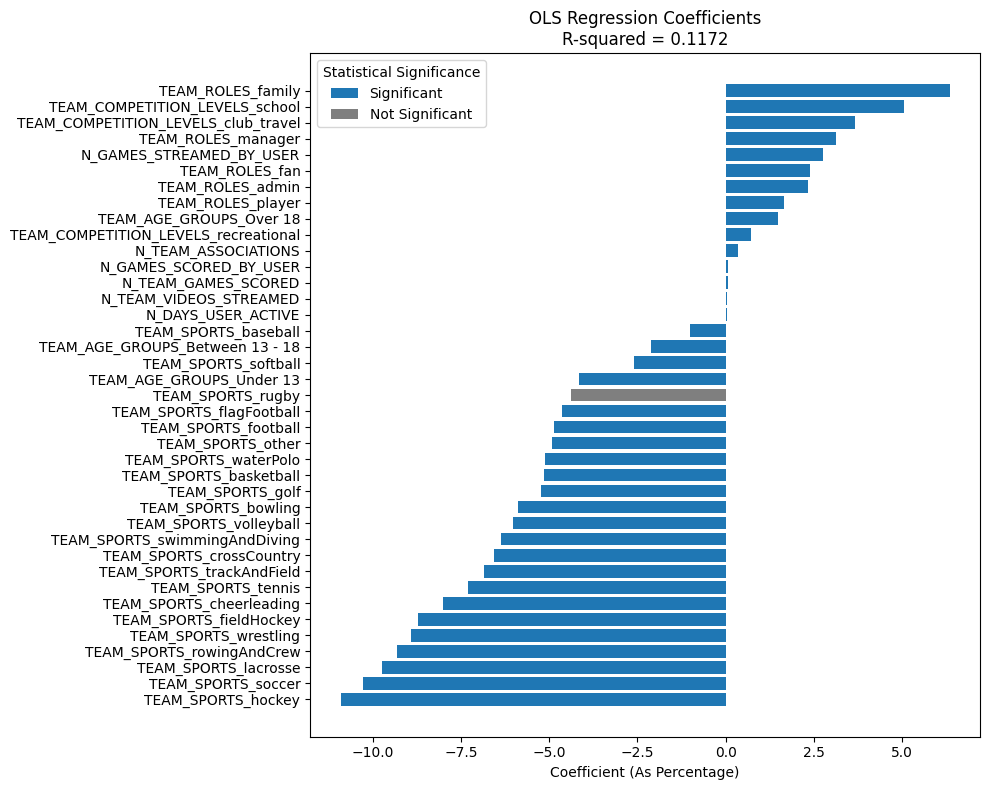

In [7]:
plot_ols_coefficients(basic_ols)

In [8]:
df['N_TEAM_ASSOCIATIONS_squared'] = df['N_TEAM_ASSOCIATIONS'] ** 2

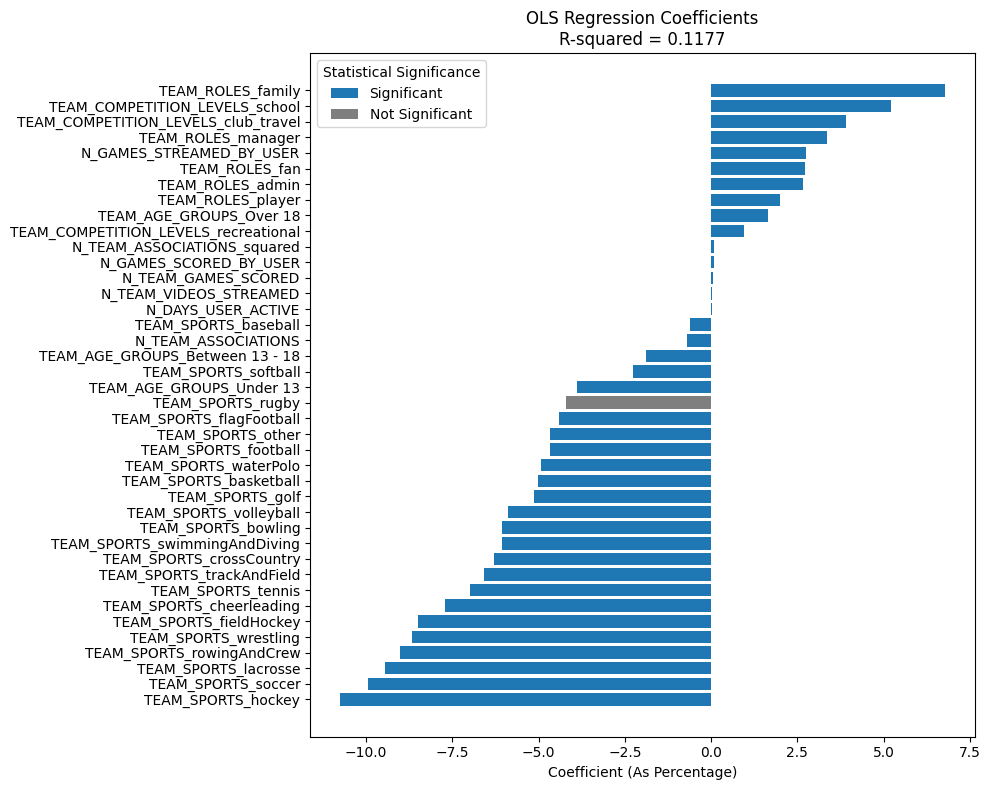

In [9]:
squared_ols = run_ols_regression(df, target_var='USER_SUBSCRIPTION_STATUS')
plot_ols_coefficients(squared_ols)

In [10]:
def plot_quadratic_from_ols(results_df, data_df):
    """
    Plots the quadratic effect of a squared variable from OLS results.
    The x-axis range is determined from the data_df column corresponding to the base variable.
    Also calculates and labels the min or max point of the quadratic curve.
    Also calculates and labels the x-intercepts (where the quadratic crosses the x-axis).
    
    Args:
        results_df: DataFrame with OLS regression results (must include variable, Coef., etc.)
        data_df: DataFrame containing the original data (used to determine x range)
    """

    # Find the column with '_squared' in the name
    squared_row = results_df[results_df['variable'].str.contains('_squared')]
    if squared_row.empty:
        print("No squared variable found in results.")
        return

    squared_var = squared_row['variable'].values[0]
    base_var = squared_var.replace('_squared', '')

    # Find the matching base variable row
    base_row = results_df[results_df['variable'] == base_var]
    if base_row.empty:
        print(f"No base variable found for {squared_var}.")
        return

    # Get coefficients
    coef_squared = squared_row['Coef.'].values[0]
    coef_base = base_row['Coef.'].values[0]
    # Get intercept if present
    if 'const' in results_df['variable'].values:
        intercept = results_df[results_df['variable'] == 'const']['Coef.'].values[0]
    else:
        intercept = 0

    # Create equation: y = a*x^2 + b*x + c
    a = coef_squared
    b = coef_base
    c = intercept

    # Determine x range from data_df[base_var]
    if base_var in data_df.columns:
        min_x = data_df[base_var].min()
        max_x = data_df[base_var].max()
        # Add a small margin for better visualization
        margin = (max_x - min_x) * 0.1
        x = np.linspace(min_x - margin, max_x + margin, 500)
    else:
        # Fallback to default range if base_var not in data_df
        print(f"Warning: {base_var} not found in data_df. Using default range -110 to 110.")
        x = np.linspace(-110, 110, 500)

    y = a * x**2 + b * x + c

    # Calculate the min or max point of the quadratic (vertex)
    if a != 0:
        x_vertex = -b / (2 * a)
        y_vertex = a * x_vertex**2 + b * x_vertex + c
        vertex_type = "Minimum" if a > 0 else "Maximum"
        show_vertex = (x.min() <= x_vertex <= x.max())
    else:
        x_vertex = None
        y_vertex = None
        vertex_type = None
        show_vertex = False

    # Calculate the x-intercepts (roots) where y = 0
    # a*x^2 + b*x + c = 0
    roots = []
    if a != 0:
        discriminant = b**2 - 4*a*c
        if discriminant >= 0:
            sqrt_disc = np.sqrt(discriminant)
            x1 = (-b + sqrt_disc) / (2*a)
            x2 = (-b - sqrt_disc) / (2*a)
            # Only show roots that are within the plotted x range
            if x.min() <= x1 <= x.max():
                roots.append(x1)
            if x.min() <= x2 <= x.max() and not np.isclose(x1, x2):
                roots.append(x2)
    elif b != 0:
        # Linear case: bx + c = 0 => x = -c/b
        x0 = -c / b
        if x.min() <= x0 <= x.max():
            roots.append(x0)
    # If a and b are both zero, no root unless c==0 (degenerate)

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'{a:.4g}·x² + {b:.4g}·x + {c:.4g}')
    plt.title(f'Quadratic Effect of {base_var} and {squared_var}')
    plt.xlabel(base_var)
    plt.ylabel('Predicted Value')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)

    # Plot and label the vertex if it is within the plotted x range
    if show_vertex:
        plt.scatter([x_vertex], [y_vertex], color='red', zorder=5, label=f'{vertex_type} Point')
        plt.annotate(
            f'{vertex_type} at\nx={x_vertex:.2f}, y={y_vertex:.2f}',
            xy=(x_vertex, y_vertex),
            xytext=(x_vertex, y_vertex - (y.max()-y.min())*0.1),
            arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=6),
            fontsize=10,
            color='red',
            ha='center'
        )

    # Plot and label the x-intercepts (roots) if within the plotted x range
    for i, root in enumerate(roots):
        plt.scatter([root], [0], color='green', zorder=5, label='x-intercept' if i == 0 else None)
        plt.annotate(
            f'x-intercept\nx={root:.2f}',
            xy=(root, 0),
            xytext=(root, (y.max()-y.min())*0.05),
            arrowprops=dict(facecolor='green', shrink=0.05, width=1, headwidth=6),
            fontsize=10,
            color='green',
            ha='center'
        )

    plt.legend()
    plt.tight_layout()
    plt.show()

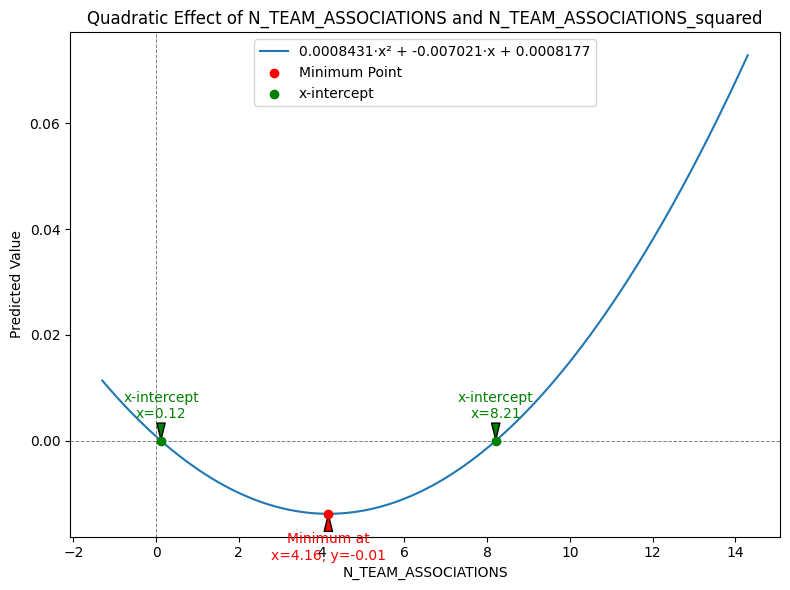

In [11]:
plot_quadratic_from_ols(squared_ols, df)

Increasing the number teams a user is associated with does not increase the probability they will subscribe. Getting a user above 8 assocations will increase the probability of subscribing but this is will be difficult (see stats).

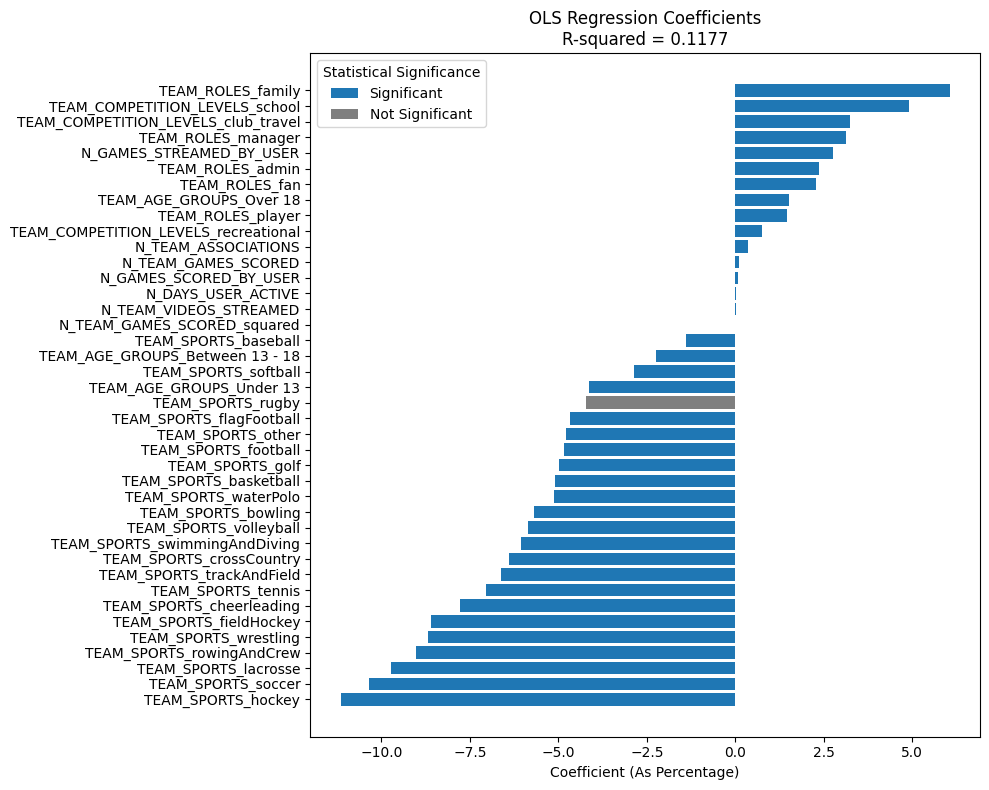

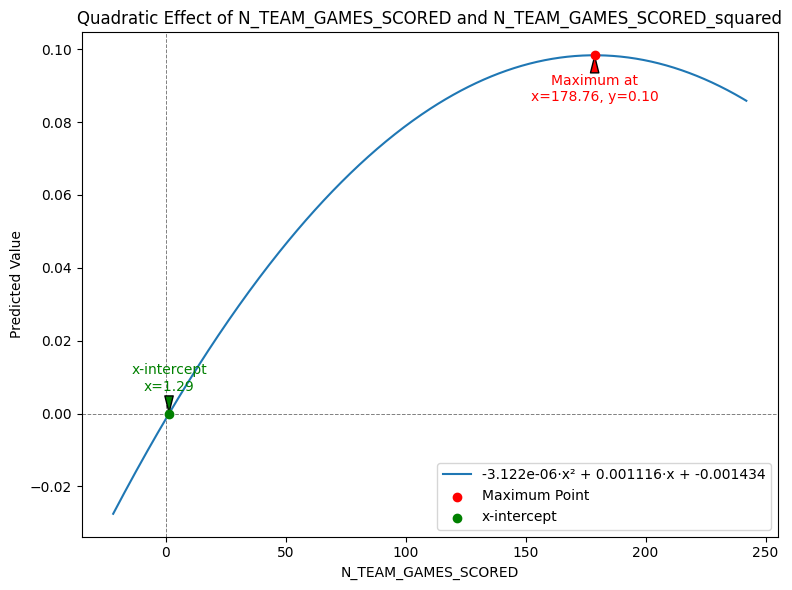

In [12]:
df.drop(columns=['N_TEAM_ASSOCIATIONS_squared'], inplace=True)
df['N_TEAM_GAMES_SCORED_squared'] = df['N_TEAM_GAMES_SCORED'] ** 2
squared_ols = run_ols_regression(df)
plot_ols_coefficients(squared_ols)
plot_quadratic_from_ols(squared_ols, df)

Any increase in teams scored will increase probability of subscription.

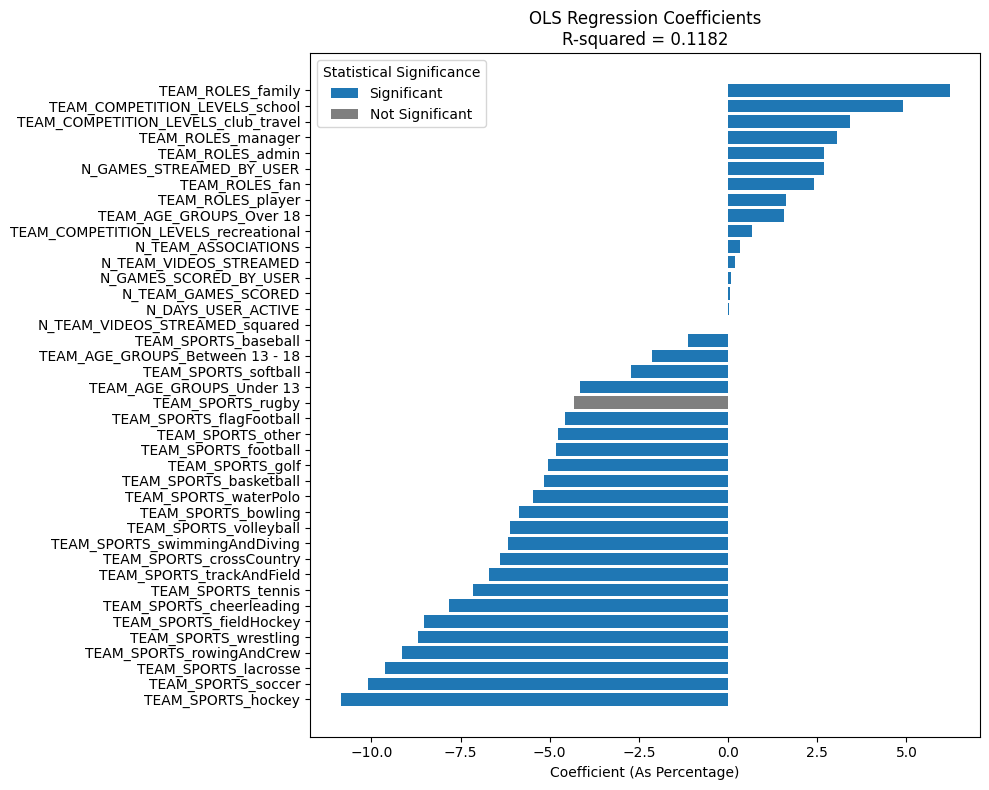

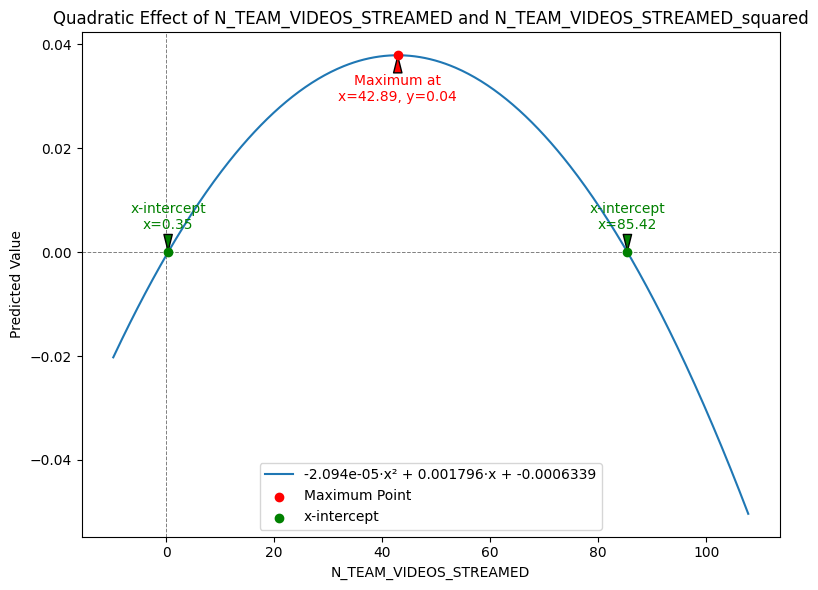

In [13]:
df.drop(columns=['N_TEAM_GAMES_SCORED_squared'], inplace=True)
df['N_TEAM_VIDEOS_STREAMED_squared'] = df['N_TEAM_VIDEOS_STREAMED'] ** 2
squared_ols = run_ols_regression(df)
plot_ols_coefficients(squared_ols)
plot_quadratic_from_ols(squared_ols, df)

Any increase in videos streamed will increase probability of subscription.

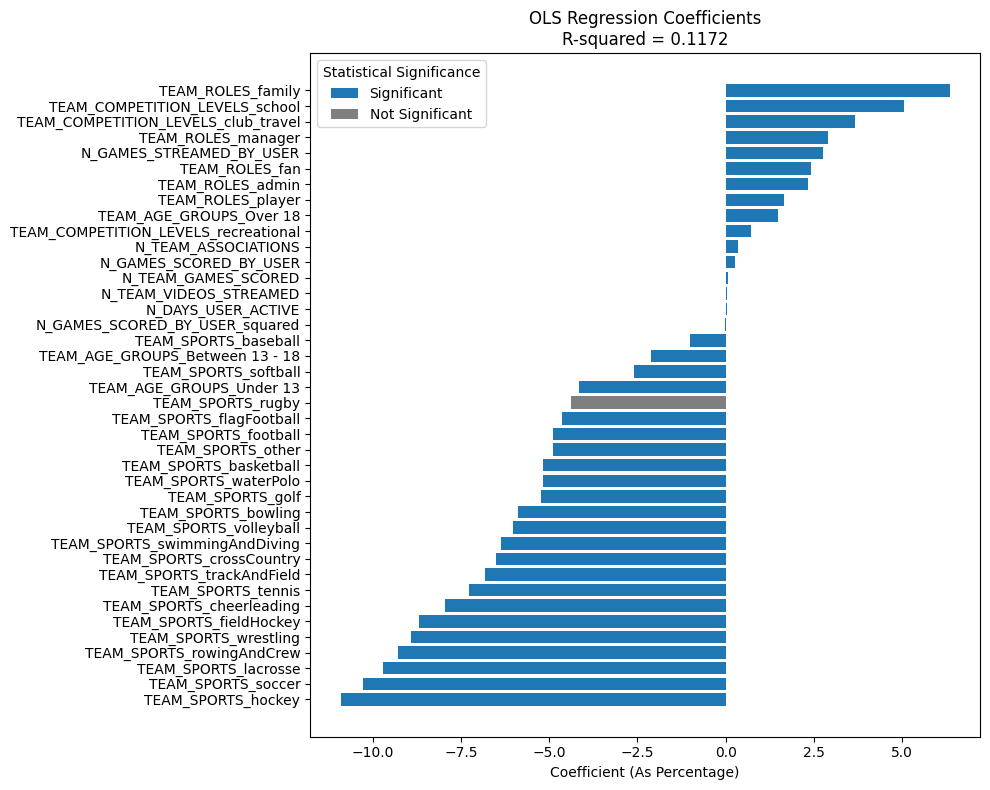

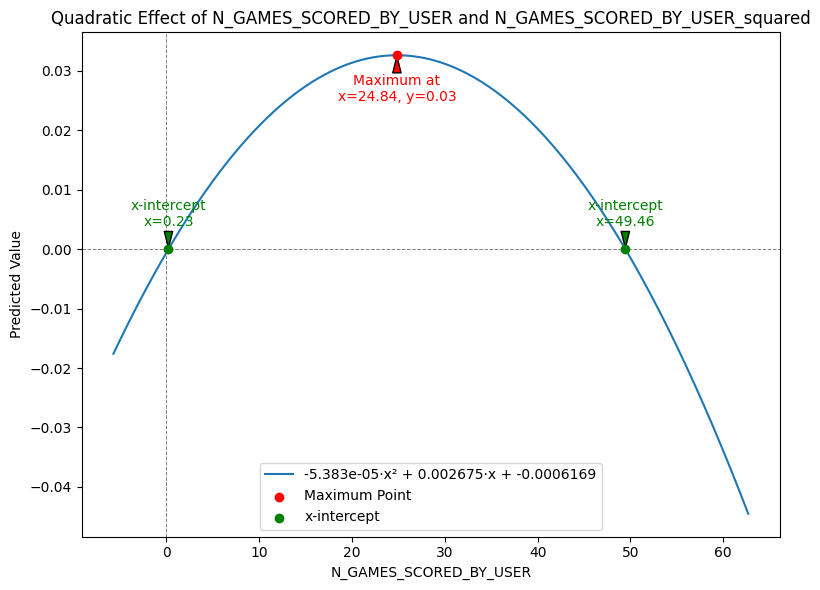

In [14]:
df.drop(columns=['N_TEAM_VIDEOS_STREAMED_squared'], inplace=True)
df['N_GAMES_SCORED_BY_USER_squared'] = df['N_GAMES_SCORED_BY_USER'] ** 2
squared_ols = run_ols_regression(df)
plot_ols_coefficients(squared_ols)
plot_quadratic_from_ols(squared_ols, df)

Same as above.

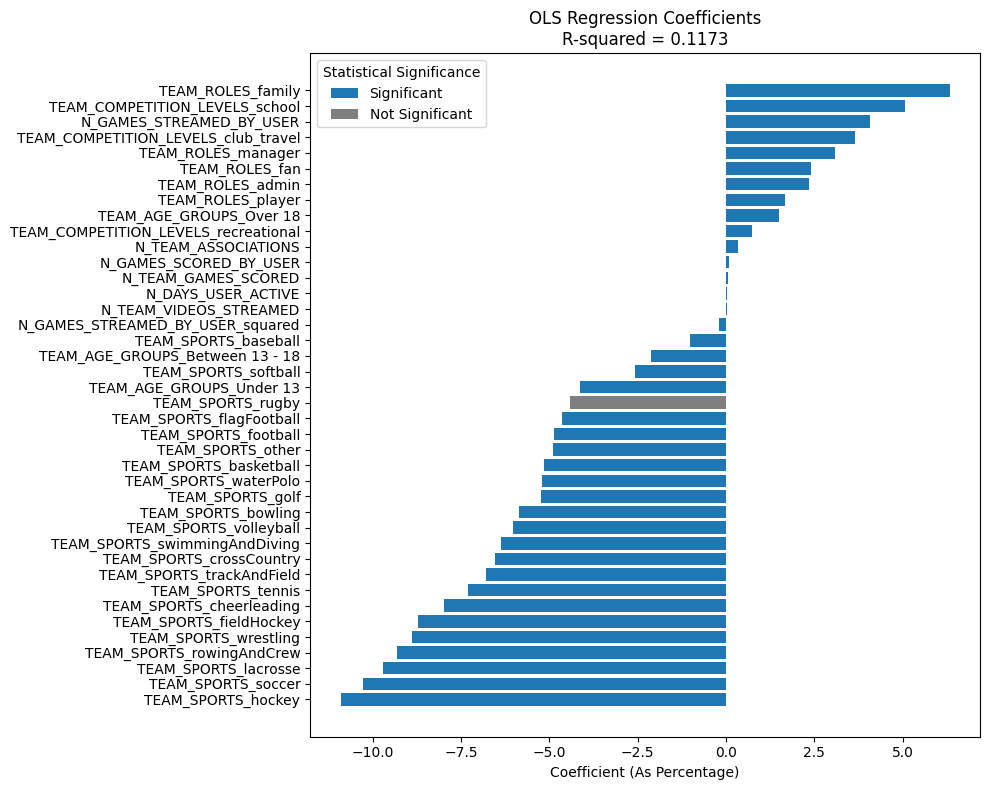

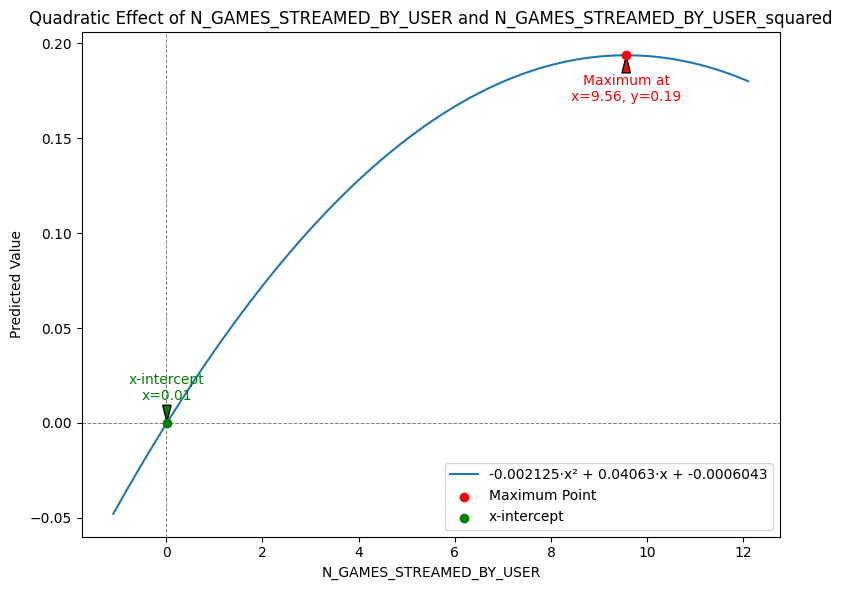

In [15]:
df.drop(columns=['N_GAMES_SCORED_BY_USER_squared'], inplace=True)
df['N_GAMES_STREAMED_BY_USER_squared'] = df['N_GAMES_STREAMED_BY_USER'] ** 2
squared_ols = run_ols_regression(df)
plot_ols_coefficients(squared_ols)
plot_quadratic_from_ols(squared_ols, df)

Same as above

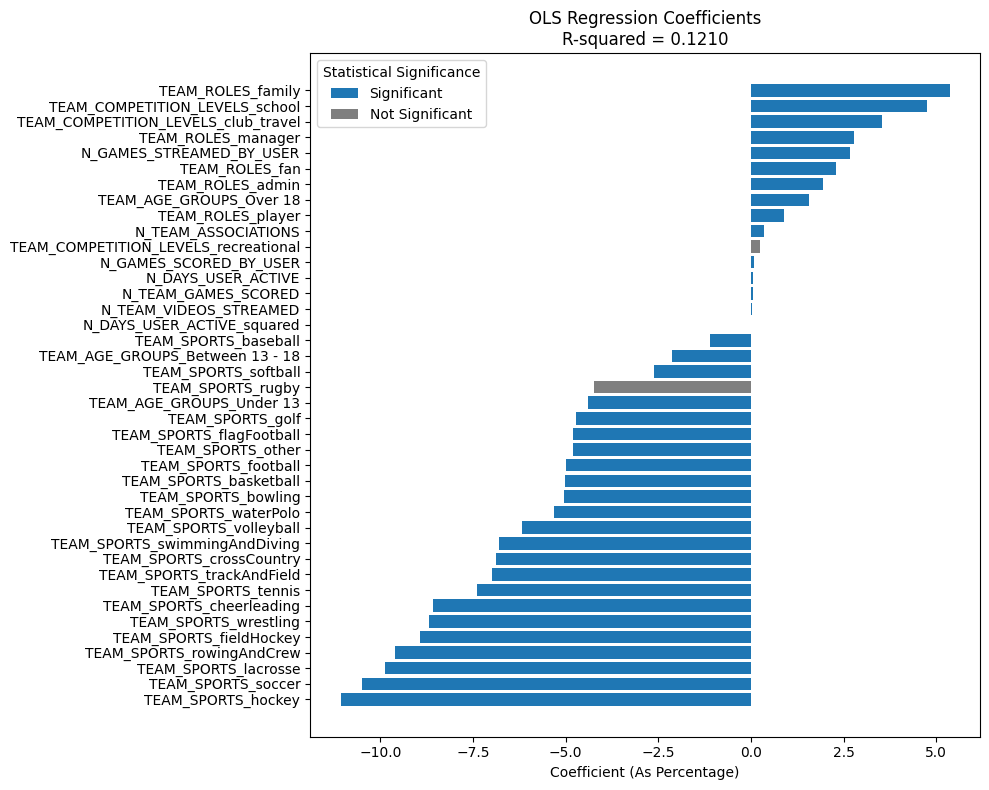

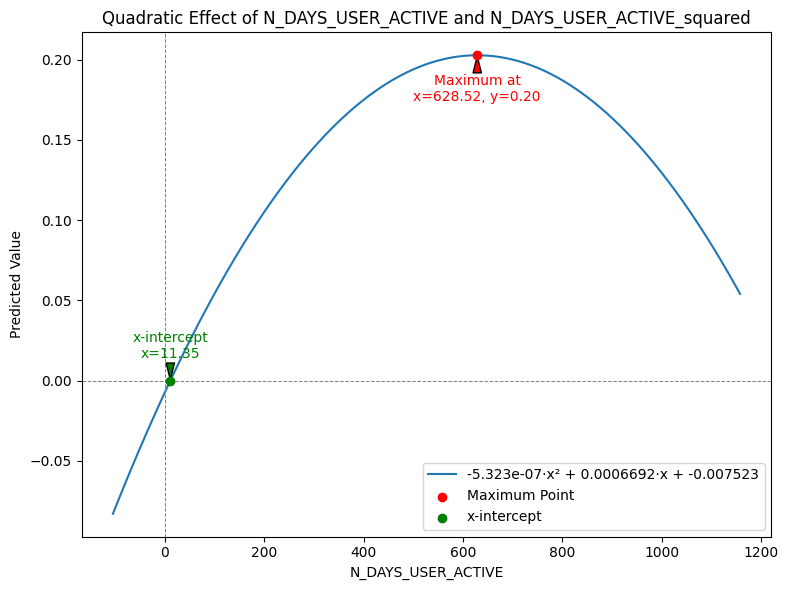

In [16]:
df.drop(columns=['N_GAMES_STREAMED_BY_USER_squared'], inplace=True)
df['N_DAYS_USER_ACTIVE_squared'] = df['N_DAYS_USER_ACTIVE'] ** 2
squared_ols = run_ols_regression(df)
plot_ols_coefficients(squared_ols)
plot_quadratic_from_ols(squared_ols, df)

The beginning point of when users have a positive probability of subscribing is after 11 days of use. From there as they use the app more the high probability they are to subscribe.

## The Story
- The more users use the app the higher the chance they are to subscribe.  
    - Action -> incentives more usage of the platform. 
    - Ideas -> streaks, notifications, network effects.

- Targeted marketing for these groups as they have a higher chance of subscribing compared to the others:
    - TEAM_ROLES: family & manager (all are positive so encouraging users to select one can help increase subscription rates)
    - TEAM_COMPETITION_LEVELS: school & club_travel (same as above)
    - TEAM_AGE_GROUPS: Over 18

In [17]:
basic_ols[basic_ols['Coef.%'] > 0].sort_values('Coef.%', ascending=False)

,variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],R-squared,Stat.Signif.,Coef.%
13,TEAM_ROLES_family,0.063432,0.001440,44.062540,0.000000e+00,0.060611,0.066254,0.117161,Significant,6.343242
10,TEAM_COMPETITION_LEVELS_school,0.050540,0.001476,34.250647,9.641356e-257,0.047648,0.053432,0.117161,Significant,5.054036
11,TEAM_COMPETITION_LEVELS_club_travel,0.036555,0.001355,26.980751,3.405604e-160,0.033900,0.039211,0.117161,Significant,3.655527
15,TEAM_ROLES_manager,0.031233,0.001558,20.049913,2.226139e-89,0.028179,0.034286,0.117161,Significant,3.123257
5,N_GAMES_STREAMED_BY_USER,0.027652,0.000936,29.538690,1.441415e-191,0.025817,0.029487,0.117161,Significant,2.765182
14,TEAM_ROLES_fan,0.024035,0.001268,18.951594,4.626193e-80,0.021549,0.026520,0.117161,Significant,2.403479
16,TEAM_ROLES_admin,0.023207,0.002983,7.779276,7.310429e-15,0.017360,0.029054,0.117161,Significant,2.320692
17,TEAM_ROLES_player,0.016530,0.001804,9.165156,4.968766e-20,0.012995,0.020065,0.117161,Significant,1.653002
9,TEAM_AGE_GROUPS_Over 18,0.014902,0.002239,6.656584,2.806058e-11,0.010514,0.019290,0.117161,Significant,1.490233
12,TEAM_COMPETITION_LEVELS_recreational,0.007316,0.001339,5.463931,4.659669e-08,0.004692,0.009941,0.117161,Significant,0.731630


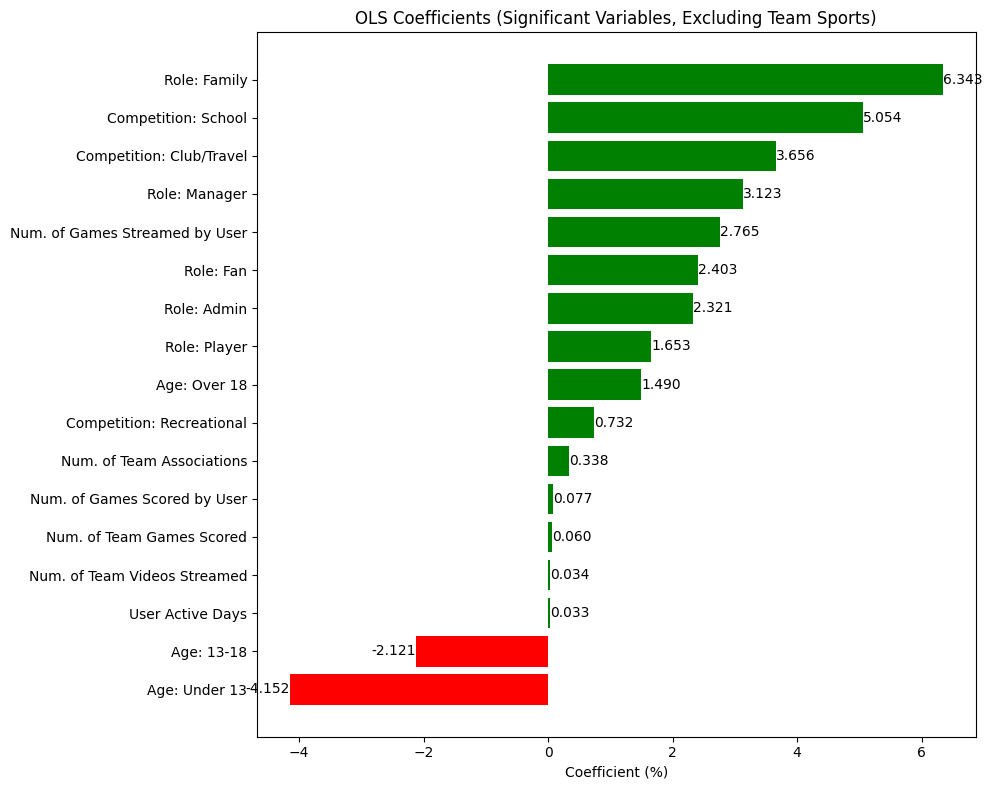

In [22]:
# Copy the table to avoid modifying the original
plot_df = basic_ols.copy()

# Remove TEAM_SPORT rows
plot_df = plot_df[~plot_df['variable'].str.startswith('TEAM_SPORTS_')]

# Keep only significant rows
plot_df = plot_df[plot_df['Stat.Signif.'] == 'Significant']

# Create a mapping for more viewer-friendly variable names
friendly_names = {
    'N_TEAM_ASSOCIATIONS': 'Num. of Team Associations',
    'N_TEAM_GAMES_SCORED': 'Num. of Team Games Scored',
    'N_TEAM_VIDEOS_STREAMED': 'Num. of Team Videos Streamed',
    'N_GAMES_SCORED_BY_USER': 'Num. of Games Scored by User',
    'N_GAMES_STREAMED_BY_USER': 'Num. of Games Streamed by User',
    'N_DAYS_USER_ACTIVE': 'User Active Days',
    'N_DAYS_USER_ACTIVE_squared': 'User Active Days (squared)',
    'N_GAMES_SCORED_BY_USER_squared': 'Games Scored by User (squared)',
    'N_GAMES_STREAMED_BY_USER_squared': 'Games Streamed by User (squared)',
    'TEAM_ROLES_family': 'Role: Family',
    'TEAM_ROLES_manager': 'Role: Manager',
    'TEAM_ROLES_admin': 'Role: Admin',
    'TEAM_ROLES_fan': 'Role: Fan',
    'TEAM_ROLES_player': 'Role: Player',
    'TEAM_COMPETITION_LEVELS_school': 'Competition: School',
    'TEAM_COMPETITION_LEVELS_club_travel': 'Competition: Club/Travel',
    'TEAM_COMPETITION_LEVELS_recreational': 'Competition: Recreational',
    'TEAM_AGE_GROUPS_Over 18': 'Age: Over 18',
    'TEAM_AGE_GROUPS_Between 13 - 18': 'Age: 13-18',
    'TEAM_AGE_GROUPS_Under 13': 'Age: Under 13',
    'const': 'Intercept'
}
plot_df['Friendly Variable'] = plot_df['variable'].map(lambda x: friendly_names.get(x, x))

# Sort by coefficient for better visualization
plot_df = plot_df.sort_values('Coef.%', ascending=True)

# Set up bar colors: green for positive, red for negative
colors = plot_df['Coef.%'].apply(lambda x: 'green' if x > 0 else 'red')

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(plot_df['Friendly Variable'], plot_df['Coef.%'], color=colors)

# Add coefficient labels to each bar
for bar, coef in zip(bars, plot_df['Coef.%']):
    xpos = bar.get_width()
    ax.text(
        xpos + (0.002 if xpos > 0 else -0.002), 
        bar.get_y() + bar.get_height()/2, 
        f"{coef:.3f}", 
        va='center',
        ha='left' if xpos > 0 else 'right',
        color='black',
        fontsize=10
    )

ax.set_xlabel('Coefficient (%)')
ax.set_title('OLS Coefficients (Significant Variables, Excluding Team Sports)')
plt.tight_layout()
plt.savefig("ols_coefficients_significant_vars.png", dpi=200, bbox_inches='tight')
plt.show()